# Part 1
A parent company controls a number of subsidiary technology companies. You have access to a data set at https://richardson.byu.edu/220/tech_data.csv. The dataset contains NumEmployees representing the workforce size, NumYears indicating operational tenure of the subsidiary, TechType specifying the specialization as either "Software," "Hardware," or "AI," and AnnualRevenue denoting yearly earnings in millions of dollars for various tech companies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

url = "https://richardson.byu.edu/220/tech_data.csv"
data = pd.read_csv(url)

data.head()

,NumEmployees,NumYears,TechType,AnnualRevenue
0,1090,9,Software,632.23
1,1749,7,AI,1017.24
2,1879,4,Hardware,959.39
3,1695,7,AI,990.76
4,1840,2,Software,1002.28


# Nueva sección

**Problem 1**: Make a figure to explore the relationship between Annual Revenue and the number of employees.

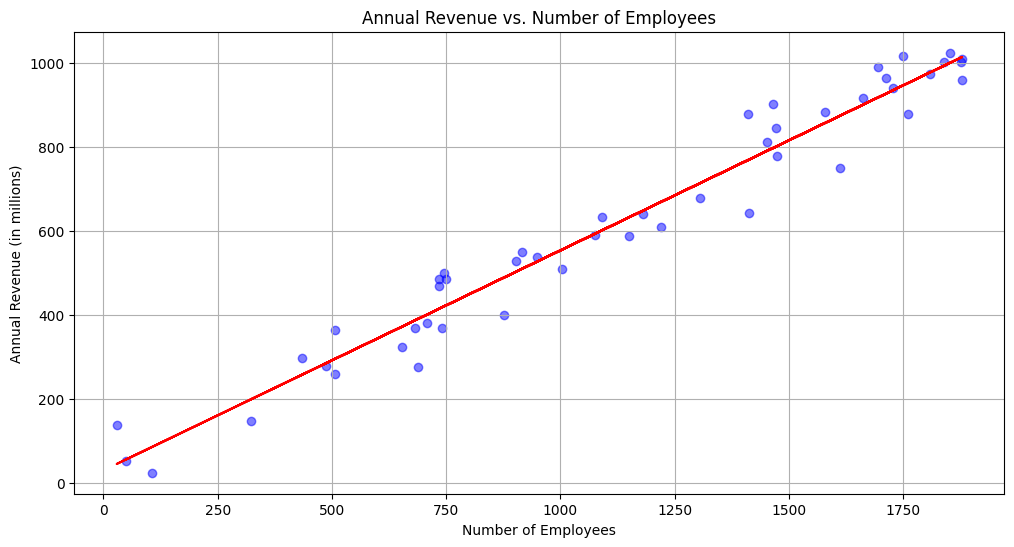

In [2]:
#Dummy
x = data["NumEmployees"]
y = data["AnnualRevenue"]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.title("Annual Revenue vs. Number of Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Annual Revenue")
plt.grid(True)
plt.show()


**Problem 2**: Make a figure to explore the relationship between Annual Revenue and the TechType variable

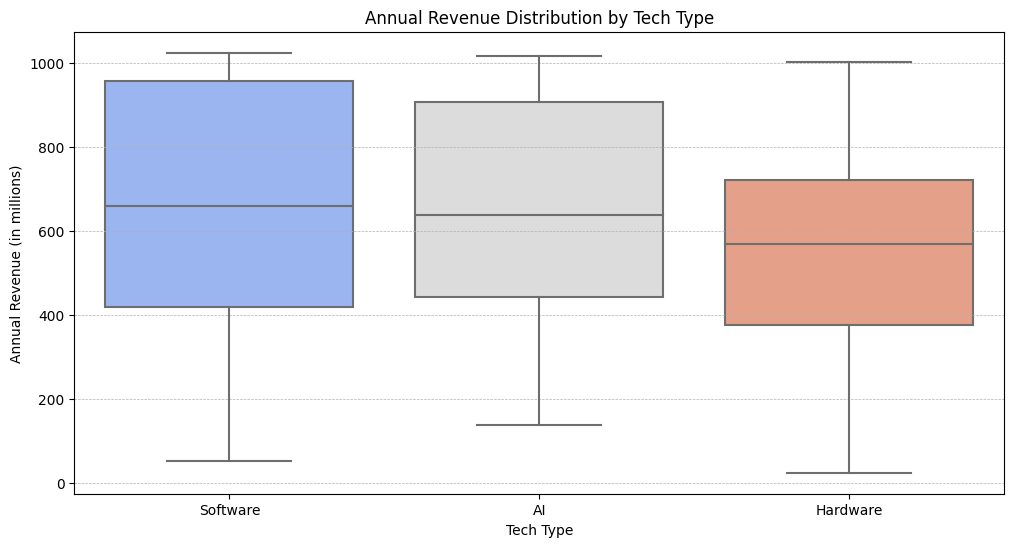

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["TechType"], y=data["AnnualRevenue"], palette="coolwarm")

plt.title("Annual Revenue Distribution by Tech Type")
plt.xlabel("Tech Type")
plt.ylabel("Annual Revenue (in millions)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()

**Problem 3**: Build a linear regression model for estimating annual revenue as a function of the other variables. Display the regression coefficients.

In [4]:
data_encoded = pd.get_dummies(data, columns=['TechType'], drop_first=True)

X = data_encoded.drop('AnnualRevenue', axis=1)
y = data_encoded['AnnualRevenue']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          AnnualRevenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     522.0
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           7.91e-36
Time:                        01:45:58   Log-Likelihood:                -246.17
No. Observations:                  48   AIC:                             502.3
Df Residuals:                      43   BIC:                             511.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               100.1687     22.09

**Problem 4**: Provide interpretations for the regression coefficients, including the intercept.

Intercept: A starting tech company in AI with no employees is expected to have a baseline Annual Revenue of about $100.1687

NumEmployees: Every additional employee is associated with an increase of approx $519,600 Annual Revenue

NumYears: For each year a company has been operational, the Annuel Revenue decreases by about 1.6149 million.

TechType_Hardware: Companies of this type earn about 88.7420 less in Annual Revenue.

TechType_Software: This companies earn about 58.4217 million less.

**Problem 5** You are asked to use your analysis to determine the effect of age on annual revenue. Write a brief description that you would send to a supervisor that states what you used to determine the effect of age on annual revenue and what effect you discovered.

Using a linear regression model with the data, I assessed the effect of a company's operational age, 'NumYears', on its annual revenue. The findings indicate that for each additional year in operation, a company's revenue decreases by about $1.6149 million. This suggests operational age may have challenges tied to revenue generation.

**Problem 6** Using the same data, build a regression tree that uses annual revenue as the target and the other variables as predictors. Limit the maximum depth of the tree to be 3.

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

data = pd.get_dummies(data, drop_first=True)

X = data.drop('AnnualRevenue', axis=1)
y = data['AnnualRevenue']

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3)

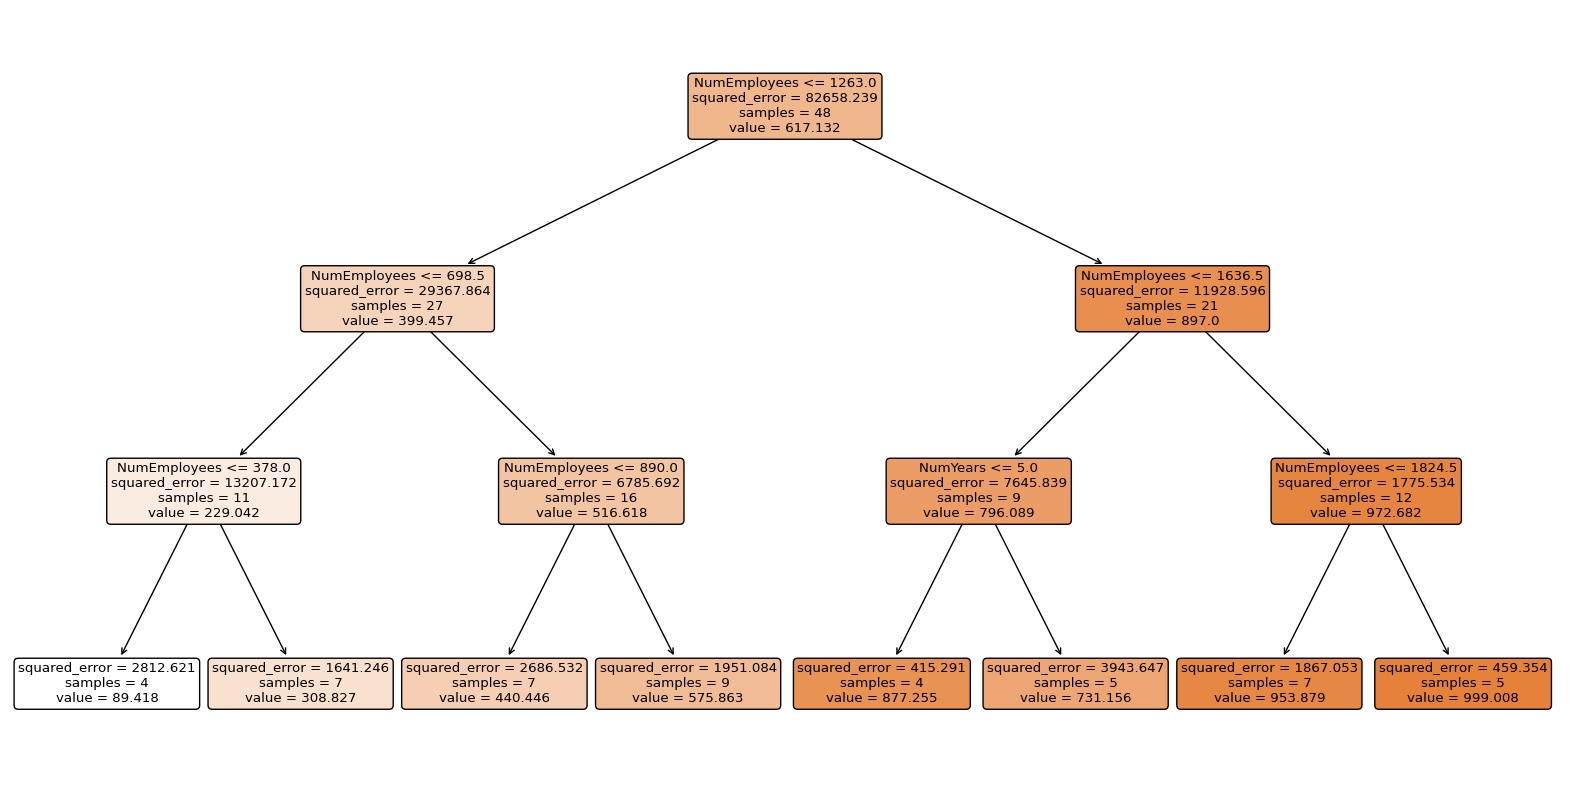

In [6]:
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()

**Problem 7**: Interpret the information given in the root node. What is the split? What do the numbers mean that are given for sample and value?

The tree splits the data based on the NumEmployees variable at a threshold of <= 698.5.

The samples represents the total number of companies in the dataset that have been considered at this node.

The value indicates the average or mean annual revenue of all the companies in the dataset.

**Problem 8**: Suppose you have a subsidiary that is a software company with 1000 employees that has been in business for 10 years. What is the predicted annual revenue using both the linear regression model and the regression tree model.

In [7]:
coefficients = {
    'const': 100.1687,
    'NumEmployees': 0.5196,
    'NumYears': -1.6149,
    'TechType_Hardware': -88.7420,
    'TechType_Software': -58.4217
}

# Given values
num_employees = 1000
num_years = 10
tech_type = 'Software'

annual_revenue_regression = (coefficients['const'] + coefficients['NumEmployees'] * num_employees + coefficients['NumYears'] * num_years)

if tech_type == 'Hardware':
    annual_revenue_regression += coefficients['TechType_Hardware']
else:
    annual_revenue_regression += coefficients['TechType_Software']

if num_employees <= 698.5:
    annual_revenue_tree = 399.457
elif num_employees <= 1263.0:
    if num_employees <= 890.0:
        annual_revenue_tree = 516.618
    else:
        annual_revenue_tree = 796.089
else:
    annual_revenue_tree = 897.0

print(f"Linear Regression Model: {annual_revenue_regression:.2f} units")
print(f"Tree Model: {annual_revenue_tree:.2f} units")

Linear Regression Model: 545.20 units
Tree Model: 796.09 units


# Part 2

Suppose that you attend a rubik's cubes (see https://en.wikipedia.org/wiki/Rubik%27s_Cube) competition where people compete to see how fast they can finish a rubik's cube.

**Problem 9**: To get the crowd excited, they are trying a new feature in the competition. They have a bag where an individual can pick a rubik's cube at random that can be small (3 by 3), medium (4 by 4), or large (5 by 5), where there is an equal probability of drawing each one. They draw one at random and start completing it as fast as they can. If there are 10 people in the competition, what is the probability that exactly 2 individuals out of the 10 draw the large rubik's cube?

In [8]:
from math import comb
from scipy.stats import norm

In [9]:
# Given values
n = 10
k = 2
p = 1/3

probability = comb(n, k) * (p**k) * ((1-p)**(n-k))

print(probability)
print('or')
print(probability * 100)

0.19509221155311707
or
19.509221155311707


**Problem 10** Let event A be the event that they complete a rubik's cube in under 10 seconds. Let event B be the event a small rubik's cube is drawn from the bag. You know that people tend to finish smaller rubik's cubes faster than bigger rubik's cubes. Can you tell if events A and B are independent? Are they mutually exclusive?

Events A and B are not independent because the size of the rubik cube affects the completion time. They are also not mutually exclusive because both can occur simultaneously.

**Problem 11** The data set is found at https://richardson.byu.edu/220/rubiks_data.csv and it contains two variables. TimeToComplete is how long someone takes to complete all three rubik's cubes and CompetitionsEntered is how many times they have competed in this event. Find the mean and standard deviation of the TimeToComplete variable.

In [10]:
url = "https://richardson.byu.edu/220/rubiks_data.csv"
data = pd.read_csv(url)

data.head()

,TimeToComplete,CompetitionsEntered
0,37.23,3
1,37.64,11
2,38.13,4
3,35.63,13
4,33.62,15


In [11]:
mean_time = data['TimeToComplete'].mean()
std_time = data['TimeToComplete'].std()

print(f"Mean of TimeToComplete: {mean_time}")
print(f"SD of TimeToComplete: {std_time}")

Mean of TimeToComplete: 38.17615
SD of TimeToComplete: 2.698029744091047


**Problem 12** Plot the TimeToComplete variable as a histogram and overlay the theoretical normal distribution on top. Does it look like this data may be normally distributed?

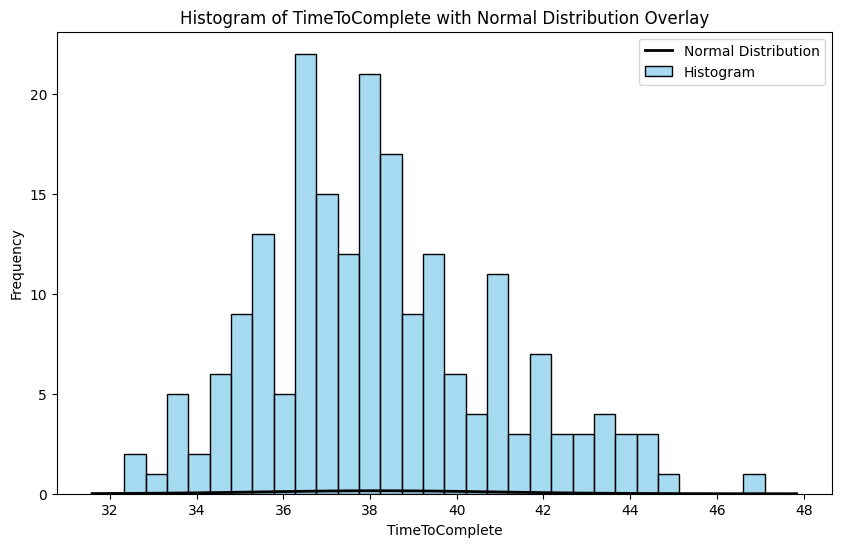

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data['TimeToComplete'], kde=False, bins=30, label='Histogram', color='skyblue', edgecolor='black')
plt.xlabel('TimeToComplete')
plt.ylabel('Frequency')
plt.title('Histogram of TimeToComplete with Normal Distribution Overlay')

mean = data['TimeToComplete'].mean()
std_dev = data['TimeToComplete'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()

Yes, data is normally distributed.

**Problem 13**: Using the estimated values for the mean and standard deviation for TimeToCompete that you computed in Problem 11 and assuming that TimeToCompete follows a normal distribution, find the probability that an individual can complete all three rubik's cube anywhere between 35 and 37 seconds. If you were not able to compute the mean and standard deviation in Problem 11, use a mean of 38 and a standard deviation of 3 (these are not the exact values but will be okay to use for this problem).

In [13]:
mu = 38.17615
sigma = 2.698029744091047

prob = norm.cdf(37, mu, sigma) - norm.cdf(35, mu, sigma)
print(prob)
print('or')
print(prob * 100)

0.21188837099073066
or
21.188837099073066


**Problem 14**: Suppose you want to build a Bayesian linear regression model where TimeToComplete is the target and CompetitionsEntered is the only predictor. You ask around and learn that a rookie that is in their first competition usually completes the challenge in about 40 seconds but certainly between 30 and 50 seconds. Also, people who enter more competitions tend to be faster (less time to complete), but perhaps by a second or less for for every competition they have entered. Based on this information, what would be good priors for the intercept and slope in the regression model.  

Prior for intercept: Normal(40, 3.33)

Prior for slope: Normal(-1, 0.5)

**Problem 15**: Implement a Bayesian linear regression model using the following priors (regardless of the ones you decided above). $\beta_0 \sim N(10,100)$ and $\beta_1 \sim N(0,1)$. Determine the Bayes estimated of the regression coefficients.

In [14]:
#!pip install pymc3

In [15]:
#!pip install mkl

import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'



In [16]:
import pymc3 as pm

with pm.Model() as model:
    # Priors
    β0 = pm.Normal('β0', mu=10, sd=100)
    β1 = pm.Normal('β1', mu=0, sd=1)

    μ = β0 + β1 * data['CompetitionsEntered']

    σ = pm.HalfNormal('σ', sd=10)
    Y_obs = pm.Normal('Y_obs', mu=μ, sd=σ, observed=data['TimeToComplete'])

    trace = pm.sample(2000, tune=1000)

β0_est = trace['β0'].mean()
β1_est = trace['β1'].mean()

print(f"Bayes estimate for β0: {β0_est}")
print(f"Bayes estimate for β1: {β1_est}")


/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Bayes estimate for β0: 39.854033468690965
Bayes estimate for β1: -0.2636579751778312
